### Some imports here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [1]:
df = pd.read_csv("disease_dataset.csv")
df.head()

NameError: name 'pd' is not defined

In [24]:
df.groupby(['gender','work_type'])['heart_disease','smoking_status'].count()

C:\Users\Anshika Verma\AppData\Local\Temp\ipykernel_11100\833295794.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['gender','work_type'])['heart_disease','smoking_status'].count()


heart_disease  smoking_status
gender work_type                                   
Female Govt_job                 399             399
       Never_worked              11              11
       Private                 1754            1754
       Self-employed            504             504
       children                 326             326
Male   Govt_job                 258             258
       Never_worked              11              11
       Private                 1170            1170
       Self-employed            315             315
       children                 361             361
Other  Private                    1               1

In [3]:
df.shape

(5110, 12)

In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Handling missing values

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.groupby("work_type").mean()

C:\Users\Anshika Verma\AppData\Local\Temp\ipykernel_13412\3924569095.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("work_type").mean()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
work_type,,,,,,,
Govt_job,36516.936073,50.879756,0.111111,0.054795,107.779772,30.522063,0.050228
Never_worked,38274.409091,16.181818,0.000000,0.000000,96.042727,25.545455,0.000000
Private,36951.227009,45.503932,0.096068,0.054017,106.796844,30.304625,0.050940
Self-employed,35551.288156,60.201465,0.175824,0.098901,112.645446,30.211871,0.079365
children,35769.432314,6.841339,0.000000,0.001456,94.400277,20.038003,0.002911


In [8]:
def ChangeVal(obj):
    if obj == "Govt_job":
        return 30.5
    elif obj == "Never_worked":
        return 25.5
    elif obj == "Private":
        return 30.2
    elif obj == "Self-employed":
        return 30.1
    else:
        return  20.2
df["bmi"] = df["bmi"].fillna(value = df["work_type"].apply(ChangeVal))

### Outliers

<Axes: >

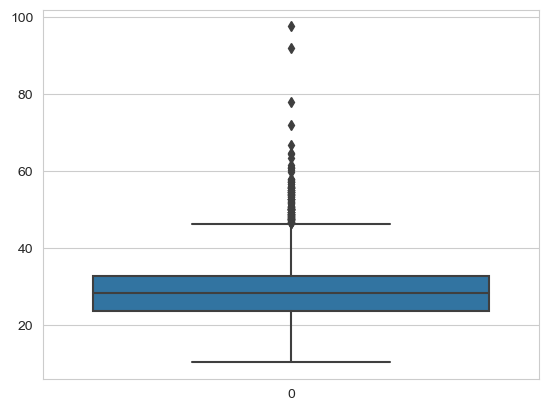

In [9]:
sns.boxplot(df['bmi'])

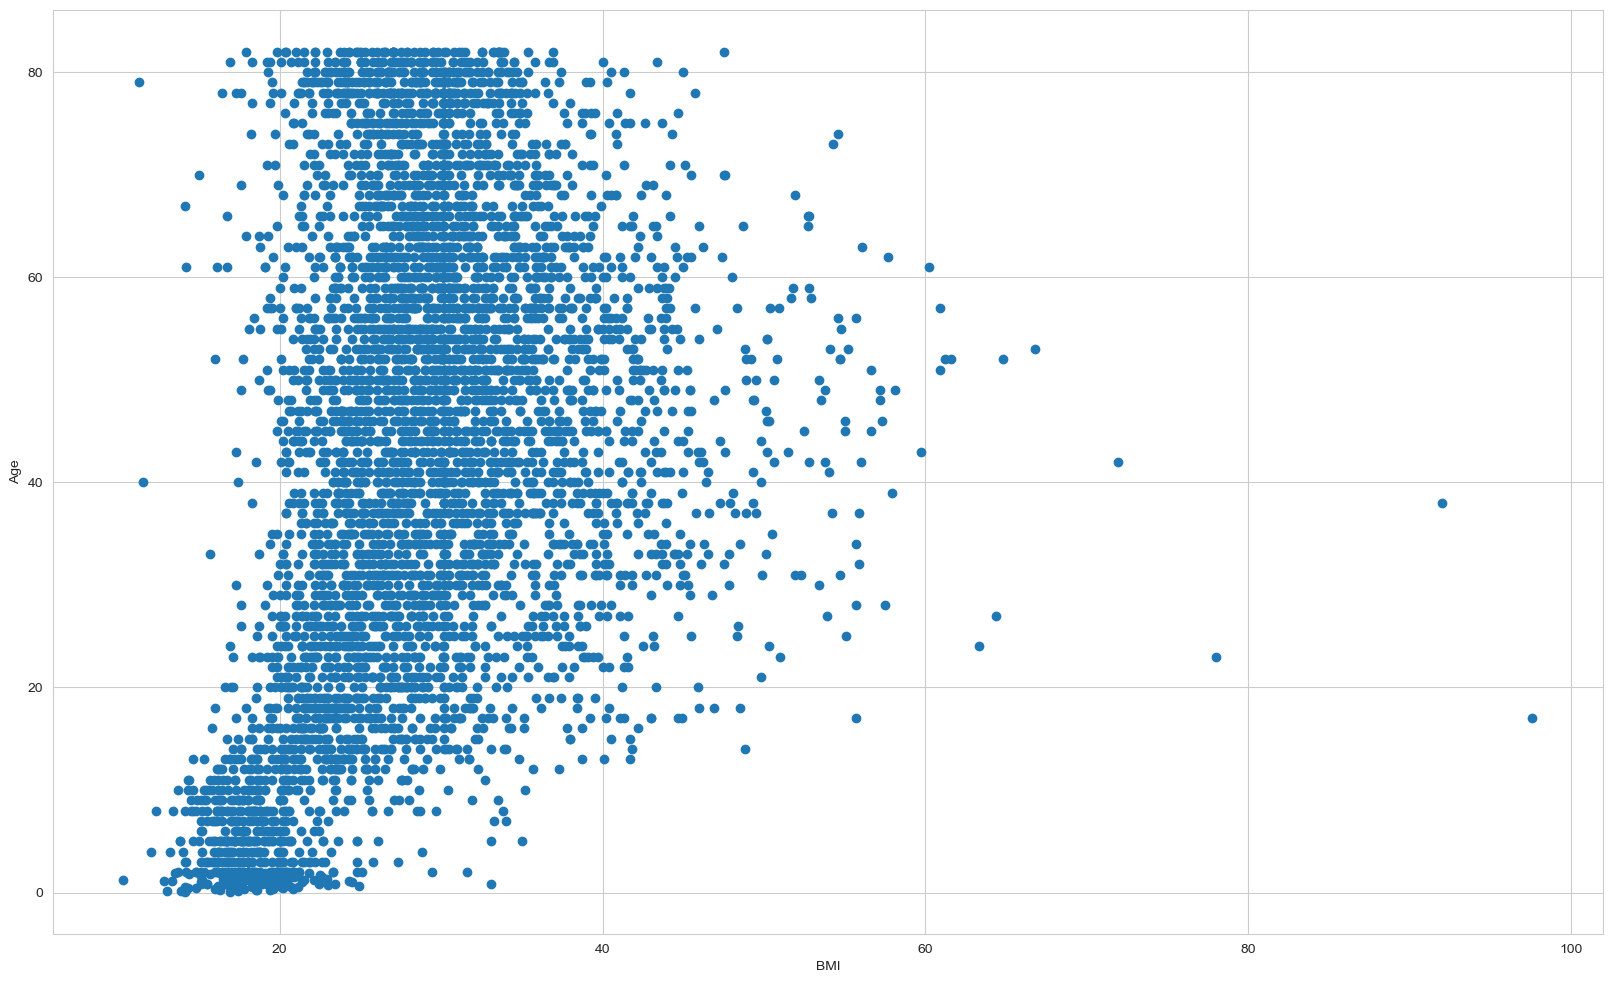

In [10]:
# Scatter plot
fig, ax = plt.subplots(figsize = (20,12))
ax.scatter(df['bmi'], df['age'])
 
# x-axis label
ax.set_xlabel('BMI')
 
# y-axis label
ax.set_ylabel('Age')
plt.show()

In [11]:
df[df['bmi']>70]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
544,545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
928,41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4209,51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


In [12]:
# IQR
Q1 = np.percentile(df['bmi'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['bmi'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

C:\Users\Anshika Verma\AppData\Local\Temp\ipykernel_13412\2725266747.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['bmi'], 25,
C:\Users\Anshika Verma\AppData\Local\Temp\ipykernel_13412\2725266747.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['bmi'], 75,


9.099999999999998

In [13]:
# Above Upper bound
upper=Q3+1.5*IQR
#upper_array=np.array(df['bmi']>=upper)
print("Upper Bound:",upper)
 
#Below Lower bound
lower=Q1-1.5*IQR
#lower_array=np.array(df['bmi']<=lower)
print("Lower Bound:",lower)

Upper Bound: 46.449999999999996
Lower Bound: 10.050000000000002


In [14]:
# Removing the outliers
df = df[df['bmi']< upper]
df = df[df['bmi']> lower]

In [61]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_type,married,work,residence,weight,smoking
0,67.0,0,1,228.69,36.6,1,1,1,2,1,4,1
1,61.0,0,0,202.21,30.1,1,0,1,3,0,3,2
2,80.0,0,1,105.92,32.5,1,1,1,2,0,3,2
3,49.0,0,0,171.23,34.4,1,0,1,2,1,3,3
4,79.0,1,0,174.12,24.0,1,0,1,3,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,30.2,0,0,1,2,1,3,2
5106,81.0,0,0,125.20,40.0,0,0,1,3,1,5,2
5107,35.0,0,0,82.99,30.6,0,0,1,3,0,3,2
5108,51.0,0,0,166.29,25.6,0,1,1,2,0,6,1


In [63]:
df.drop(['id'],axis=1,inplace=True)

KeyError: "['id'] not found in axis"

In [64]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_type,married,work,residence,weight,smoking
0,67.0,0,1,228.69,36.6,1,1,1,2,1,4,1
1,61.0,0,0,202.21,30.1,1,0,1,3,0,3,2
2,80.0,0,1,105.92,32.5,1,1,1,2,0,3,2
3,49.0,0,0,171.23,34.4,1,0,1,2,1,3,3
4,79.0,1,0,174.12,24.0,1,0,1,3,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,30.2,0,0,1,2,1,3,2
5106,81.0,0,0,125.20,40.0,0,0,1,3,1,5,2
5107,35.0,0,0,82.99,30.6,0,0,1,3,0,3,2
5108,51.0,0,0,166.29,25.6,0,1,1,2,0,6,1


In [18]:
df['work_type'].value_counts()

Private          2837
Self-employed     801
children          687
Govt_job          640
Never_worked       22
Name: work_type, dtype: int64

### Adding new Feature

In [19]:
def WeightFunc(bmi_value):
  if bmi_value < 16:
      return "Severe Thinness" 
  elif bmi_value < 17:
      return "Moderate Thinness"
  elif bmi_value < 18.5:
      return "Mild Thinness"
  elif bmi_value < 25:
      return "Normal"
  elif bmi_value < 30:
      return "Overweight"
  elif bmi_value < 35:
      return "Obese Class I"
  elif bmi_value < 40:
      return "Obese Class II"
  else:
      return "Obese Class III"
 
df["weight_status"] = df["bmi"].apply(WeightFunc)

* Rearrange the columns

In [20]:
df = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
         'Residence_type', 'avg_glucose_level', 'bmi', 'weight_status', 'smoking_status', 'stroke']]

In [21]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,weight_status,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,Obese Class II,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.1,Obese Class I,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,Obese Class I,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,Obese Class I,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,Normal,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,30.2,Obese Class I,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,Obese Class III,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,Obese Class I,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,Overweight,formerly smoked,0


C:\Users\Anshika Verma\AppData\Local\Temp\ipykernel_13412\182141565.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.iloc[:, 1:].corr(), annot = True)


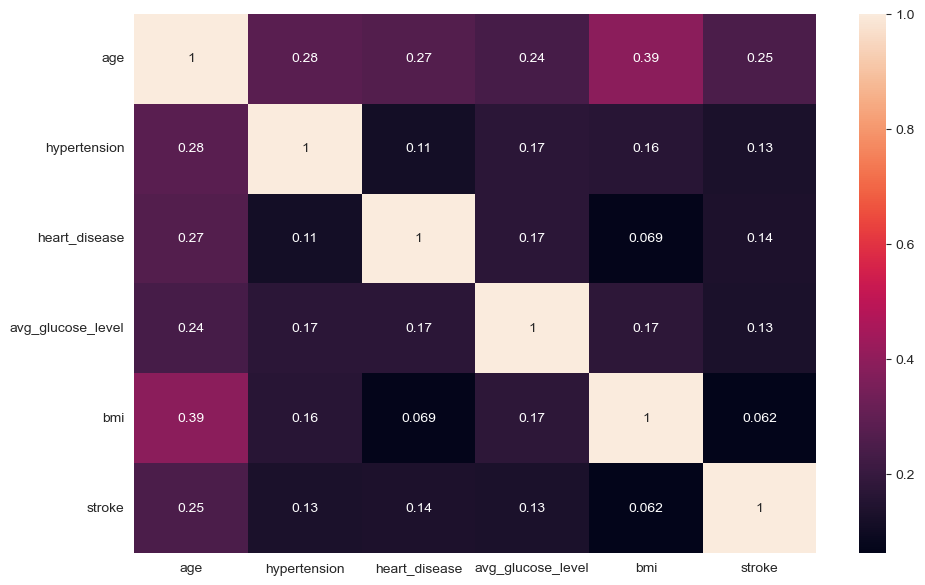

In [22]:
plt.figure(figsize = (11, 7))
sns.heatmap(df.iloc[:, 1:].corr(), annot = True)
plt.yticks(rotation = 360);

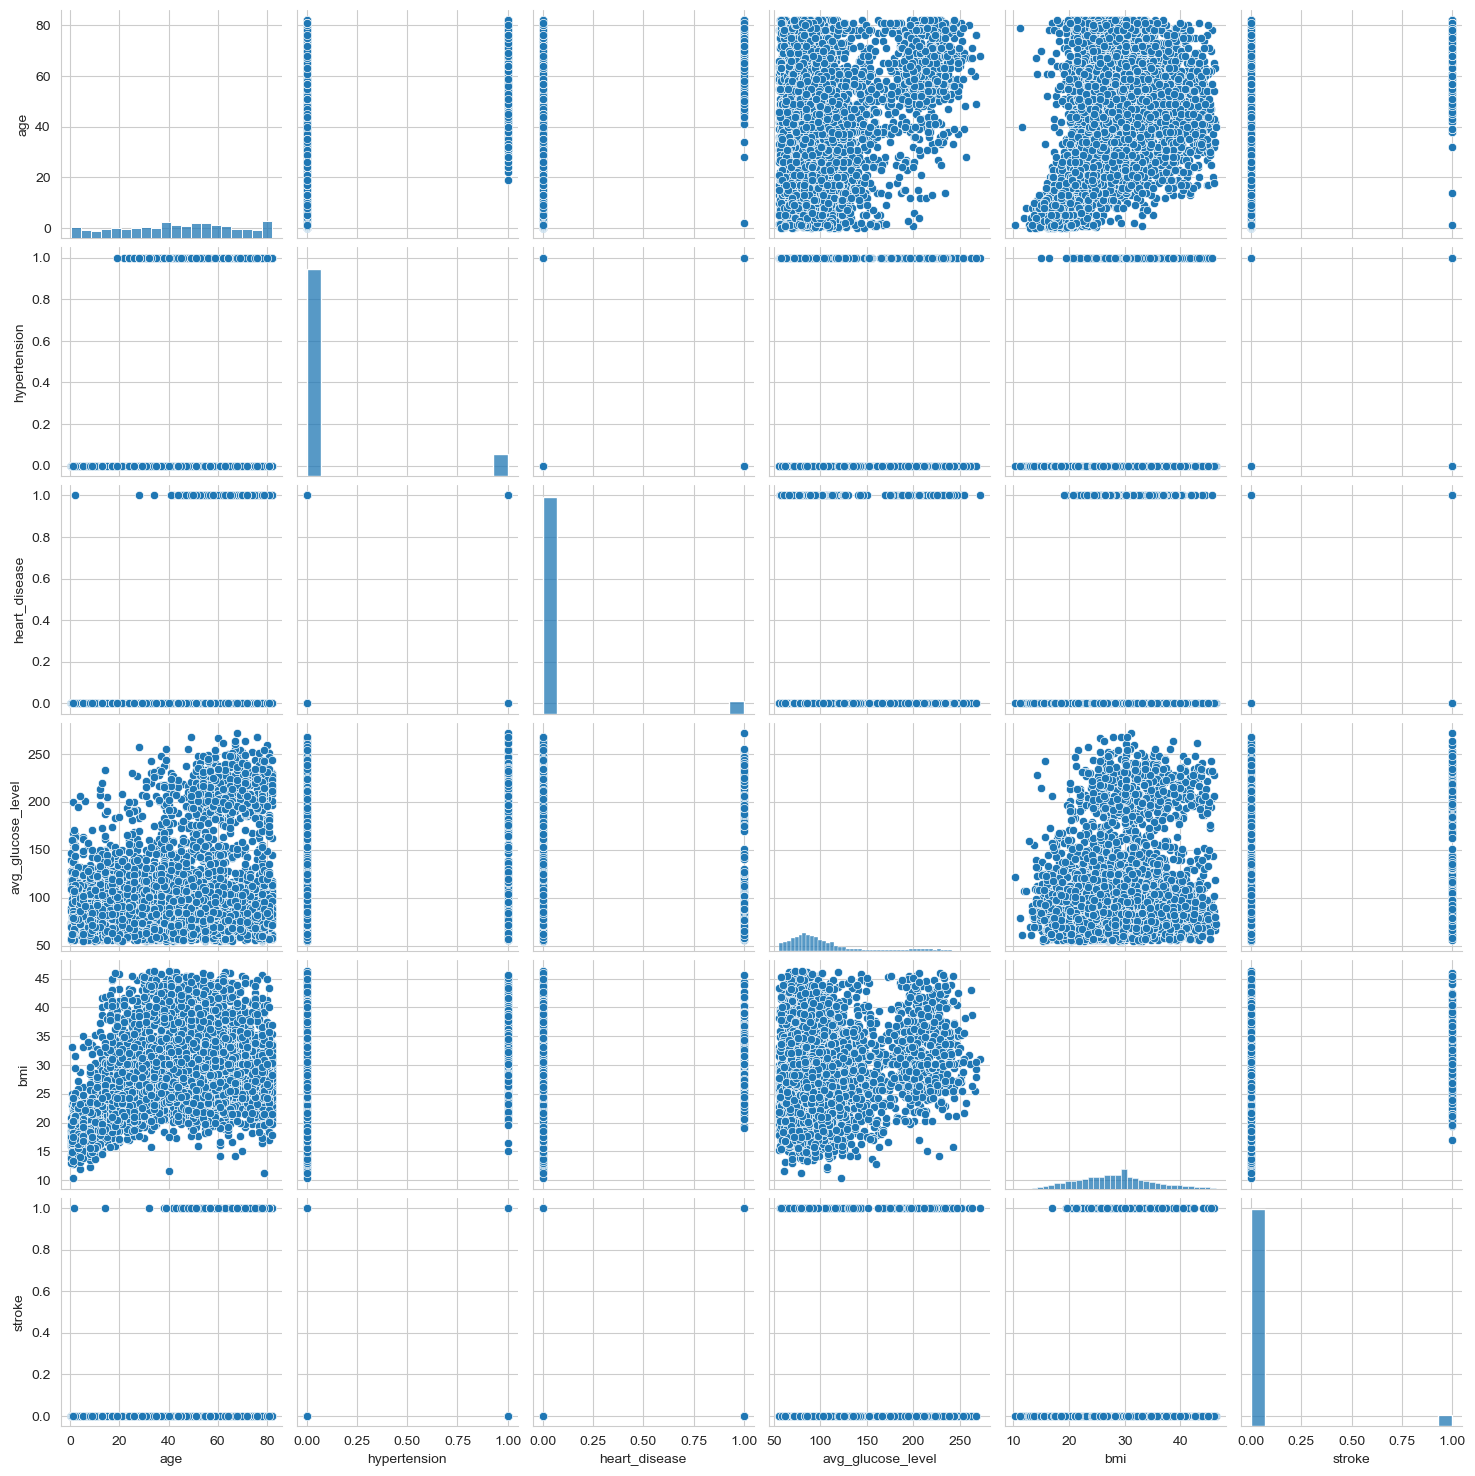

In [23]:
sns.pairplot(data = df)

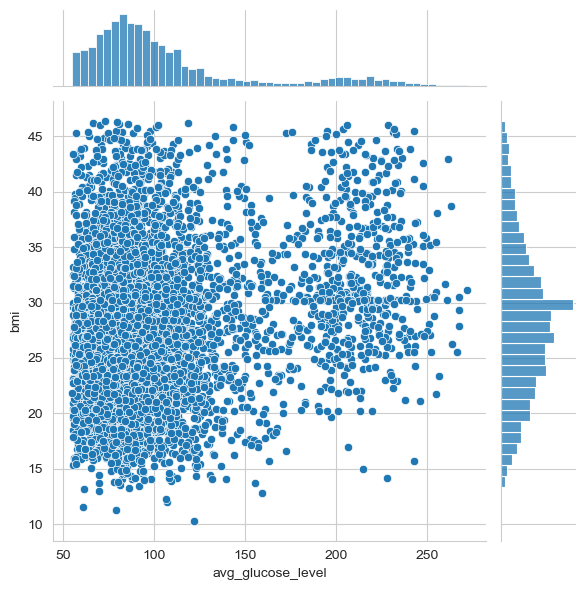

In [24]:
sns.jointplot(data = df, x = "avg_glucose_level", y = "bmi")

<Axes: xlabel='ever_married', ylabel='count'>

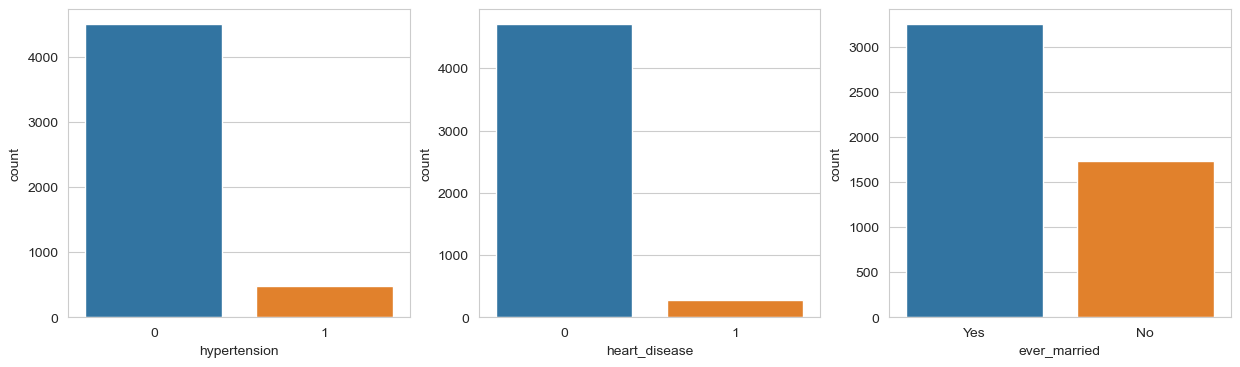

In [25]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 3, 1)
sns.countplot(data = df, x = "hypertension")

plt.subplot(1, 3, 2)
sns.countplot(data = df, x = "heart_disease")

plt.subplot(1, 3, 3)
sns.countplot(data = df, x = "ever_married")

* According to Centers for Disease Control and Prevention(CDC), Stroke risk increases with age, but strokes may occur at any age. In 2014, 38% of people hospitalized for stroke were less than 65 years old.

<Axes: title={'center': 'Sum of stroke by age'}, xlabel='count', ylabel='age'>

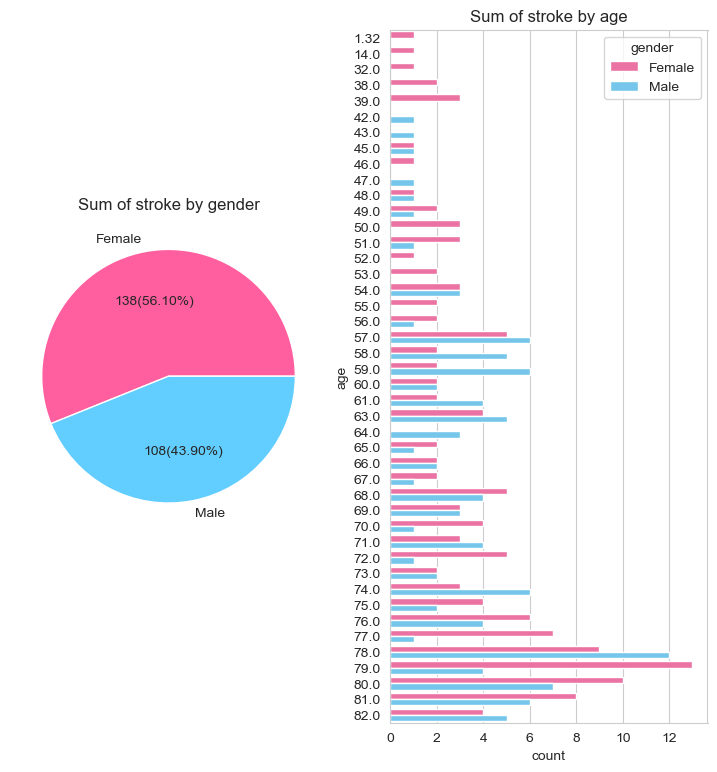

In [26]:
plt.figure(figsize = (9, 9))
gender_counts = df.loc[df["stroke"] == 1]["gender"].value_counts()
WorkType_counts = df.loc[df["stroke"] == 1]["work_type"].value_counts()

plt.subplot(1, 2, 1)
plt.title("Sum of stroke by gender")
color1 = ["#FF5F9E", "#62CDFF"]
plt.pie(gender_counts, labels = gender_counts.index, colors = color1,
        autopct = lambda x: "{:.0f}({:.2f}%)".format(x*sum(gender_counts)/100,
                                                     x*sum(gender_counts)/sum(gender_counts)));
plt.subplot(1, 2, 2)
plt.title("Sum of stroke by age")
sns.countplot(data = df.loc[df["stroke"] == 1], y = "age", hue = "gender", palette = ["#FF5F9F", "#62CDFF"],
              hue_order =["Female", "Male"] )

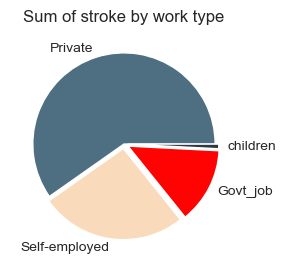

In [27]:
plt.figure(figsize = (10,11))
plt.subplot(1, 3, 3)
plt.title("Sum of stroke by work type")
color2 = ["#4E6E81", "#F9DBBB", "#FF0303", "#2E3840"]
plt.pie(WorkType_counts, labels = WorkType_counts.index, explode = [0, 0.05, 0.05, 0.04], colors = color2);

<Axes: xlabel='count', ylabel='weight_status'>

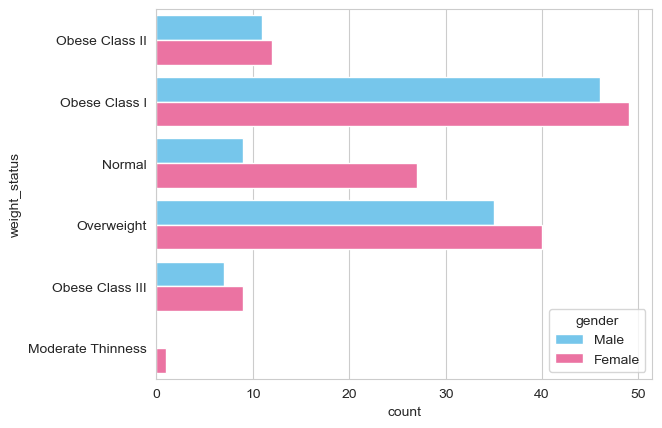

In [28]:
sns.countplot(data = df.loc[df["stroke"] == 1], y = "weight_status", hue = "gender",
              palette = ["#62CDFF", "#FF5F9E"])

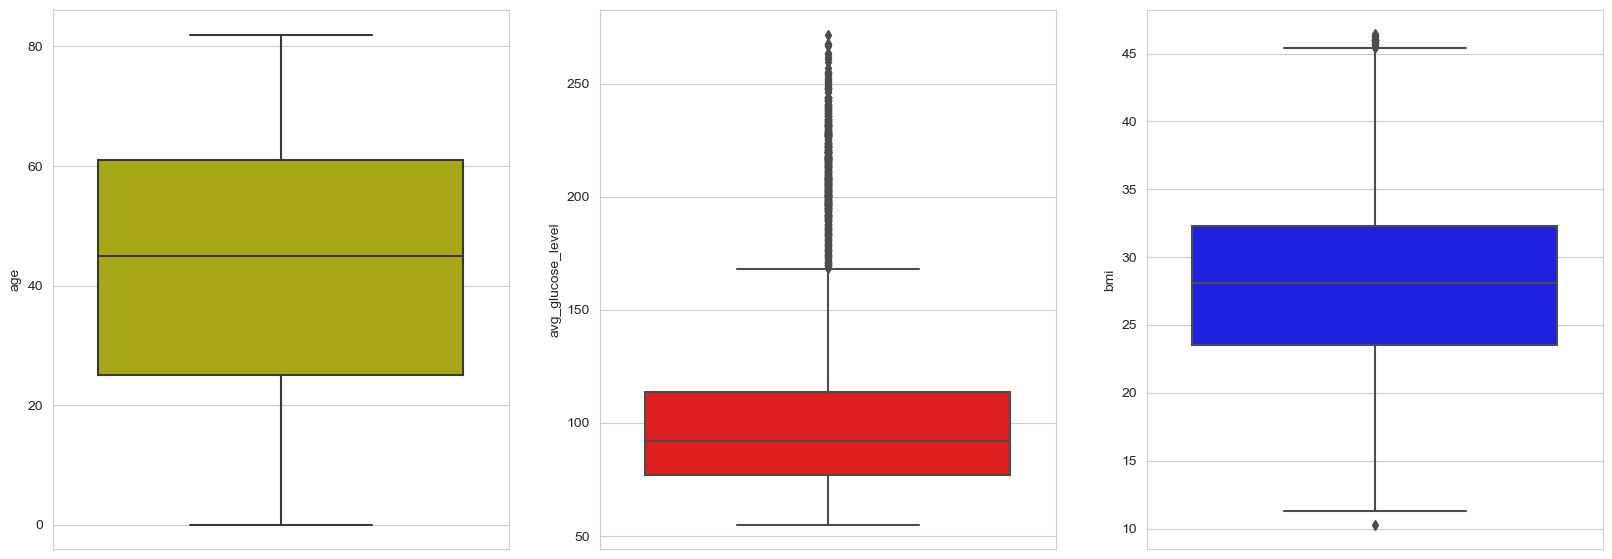

In [29]:
plt.figure(figsize = (20, 7))
plt.subplot(1, 3, 1);
sns.boxplot(data = df, y = "age", color = "y");

plt.subplot(1, 3, 2);
sns.boxplot(data = df, y = "avg_glucose_level", color = "r");

plt.subplot(1, 3, 3);
sns.boxplot(data = df, y = "bmi", color = "b");

* Stroke is the fifth leading cause of death for women.1 In the United States, 1 in 5 women between the ages of 55 and 75 will have a stroke.

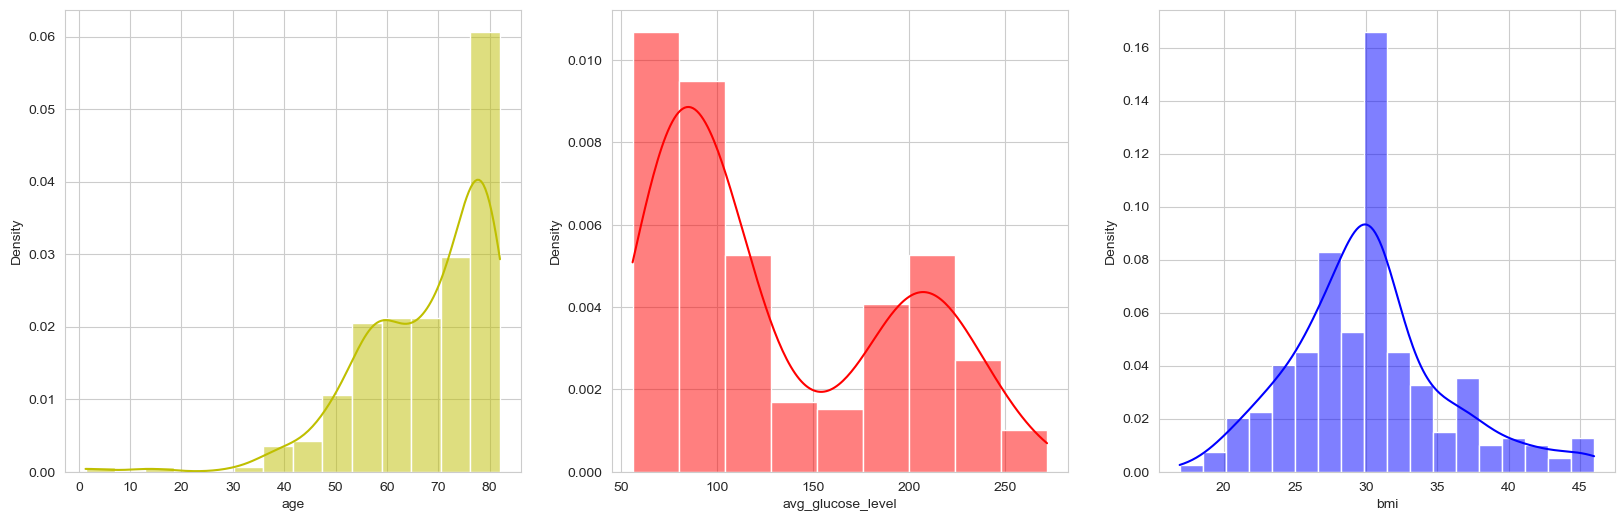

In [30]:
plt.figure(figsize = (20, 6))
plt.subplot(1, 3, 1);
sns.histplot(df.loc[df["stroke"] == 1]["age"], kde = True, stat = "density", color = "y");

plt.subplot(1, 3, 2);
sns.histplot(df.loc[df["stroke"] == 1]["avg_glucose_level"], kde = True, stat = "density", color = "r");

plt.subplot(1, 3, 3);
sns.histplot(df.loc[df["stroke"] == 1]["bmi"], kde = True, stat = "density", color = "b");

<Axes: xlabel='smoking_status', ylabel='count'>

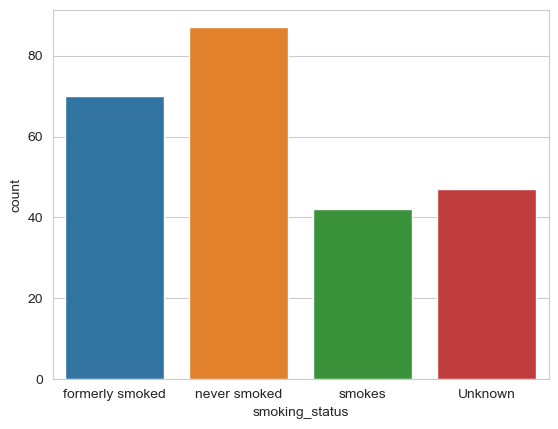

In [31]:
sns.countplot(data = df.loc[df["stroke"] == 1], x = "smoking_status")

In [32]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
weight_status         object
smoking_status        object
stroke                 int64
dtype: object

In [33]:
# checking features
cat = df.select_dtypes(include='O').keys()
# display variabels
cat

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'weight_status', 'smoking_status'],
      dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

df['gender_type'] = LE.fit_transform(df['gender'])
df['married'] = LE.fit_transform(df['ever_married'])
df['work'] = LE.fit_transform(df['work_type'])
df['residence'] = LE.fit_transform(df['Residence_type'])
df['weight'] = LE.fit_transform(df['weight_status'])
df['smoking'] = LE.fit_transform(df['smoking_status'])

C:\Users\Anshika Verma\AppData\Local\Temp\ipykernel_13412\878598200.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender_type'] = LE.fit_transform(df['gender'])
C:\Users\Anshika Verma\AppData\Local\Temp\ipykernel_13412\878598200.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['married'] = LE.fit_transform(df['ever_married'])
C:\Users\Anshika Verma\AppData\Local\Temp\ipykernel_13412\878598200.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [35]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,weight_status,smoking_status,stroke,gender_type,married,work,residence,weight,smoking
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,Obese Class II,formerly smoked,1,1,1,2,1,4,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.1,Obese Class I,never smoked,1,0,1,3,0,3,2
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,Obese Class I,never smoked,1,1,1,2,0,3,2
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,Obese Class I,smokes,1,0,1,2,1,3,3
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,Normal,never smoked,1,0,1,3,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,30.2,Obese Class I,never smoked,0,0,1,2,1,3,2
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,Obese Class III,never smoked,0,0,1,3,1,5,2
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,Obese Class I,never smoked,0,0,1,3,0,3,2
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,Overweight,formerly smoked,0,1,1,2,0,6,1


In [36]:
df['work_type'].value_counts()

Private          2837
Self-employed     801
children          687
Govt_job          640
Never_worked       22
Name: work_type, dtype: int64

In [37]:
df['work'].value_counts(),df['weight'].value_counts()

(2    2837
 3     801
 4     687
 0     640
 1      22
 Name: work, dtype: int64,
 6    1409
 2    1259
 3    1185
 4     506
 5     291
 0     169
 1      84
 7      84
 Name: weight, dtype: int64)

In [38]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'weight_status', 'smoking_status', 'stroke', 'gender_type', 'married',
       'work', 'residence', 'weight', 'smoking'],
      dtype='object')

In [39]:
# checking features
integer = df.select_dtypes(include=['int','float']).keys()
# display variabels
integer

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_type', 'married', 'work', 'residence', 'weight',
       'smoking'],
      dtype='object')

In [40]:
df = df[integer]
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_type,married,work,residence,weight,smoking
0,67.0,0,1,228.69,36.6,1,1,1,2,1,4,1
1,61.0,0,0,202.21,30.1,1,0,1,3,0,3,2
2,80.0,0,1,105.92,32.5,1,1,1,2,0,3,2
3,49.0,0,0,171.23,34.4,1,0,1,2,1,3,3
4,79.0,1,0,174.12,24.0,1,0,1,3,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,30.2,0,0,1,2,1,3,2
5106,81.0,0,0,125.20,40.0,0,0,1,3,1,5,2
5107,35.0,0,0,82.99,30.6,0,0,1,3,0,3,2
5108,51.0,0,0,166.29,25.6,0,1,1,2,0,6,1


In [41]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_type', 'married', 'work', 'residence', 'weight',
       'smoking'],
      dtype='object')

In [42]:
x = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'
        , 'gender_type', 'married', 'work', 'residence', 'weight', 'smoking']]
y = df['stroke']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,

                                                 test_size = 0.2,

                                                 random_state = 42)

In [43]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
# Making Predictions with Our Model
predictions = clf.predict(X_test)
#print(predictions[:5])

In [45]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [46]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))
p = accuracy_score(y_test, predictions)
print(p*100)

0.9048096192384769
90.48096192384769


In [53]:
t = y_test.to_frame()
v = pd.DataFrame(predictions)

In [54]:
#998/4987*100

In [49]:
y_test

3843    0
1578    0
1708    0
1106    0
4304    0
       ..
4394    0
4127    0
5024    0
194     1
4984    0
Name: stroke, Length: 998, dtype: int64

In [55]:
t.reset_index(drop=True, inplace=True)
v.reset_index(drop=True, inplace=True)

In [56]:
dff = pd.concat([t,v],axis=1)
dff.rename(columns = {0:'predicted'}, inplace = True)
dff

,stroke,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
993,0,0
994,0,0
995,0,0
996,1,0


In [57]:
dff.stroke.value_counts(),dff.predicted.value_counts()

(0    937
 1     61
 Name: stroke, dtype: int64,
 0    946
 1     52
 Name: predicted, dtype: int64)